In [147]:
import lucem_illud 

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
from wordcloud import WordCloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

import nltk

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

# Retrieving Cloud Patent Data

In [6]:
google_pd = pd.read_csv(r'C:\Users\Louisa Zhao\Desktop\CS project\cloud patent csv\Google cloud.csv')
google_pd

,patent_number,patent_date,patent_num_combined_citations,patent_kind,patent_title,patent_abstract,patent_id
0,10012766,2018-07-03,17,B2,Monitoring external vibration sources for data...,A system and method is provided for the contro...,10012766
1,10025308,2018-07-17,34,B1,System and method to obtain and use attribute ...,Example systems and methods are disclosed for ...,10025308
2,10026189,2018-07-17,32,B2,System and method for using image data to dete...,Example systems and methods are disclosed for ...,10026189
3,10027764,2018-07-17,19,B2,Associating network-hosted files with network-...,A method includes establishing a registry in w...,10027764
4,10037332,2018-07-31,14,B1,Electronic mail attachments garden,A cloud storage system receives information as...,10037332
...,...,...,...,...,...,...,...
219,9959727,2018-05-01,194,B2,Handling visitor interaction at a smart-home i...,This patent specification relates to apparatus...,9959727
220,9960929,2018-05-01,194,B2,Environmental sensing with a doorbell at a sma...,This patent specification relates to apparatus...,9960929
221,9978238,2018-05-22,194,B2,Visitor options at an entryway to a smart-home,This patent specification relates to apparatus...,9978238
222,9981191,2018-05-29,23,B2,Native gameplay experience across platforms,An operating system (OS) platform-level gaming...,9981191


In [7]:
amazon_pd = pd.read_csv(r'C:\Users\Louisa Zhao\Desktop\CS project\cloud patent csv\Amazon cloud.csv')
amazon_pd

,patent_number,patent_date,patent_num_combined_citations,patent_kind,patent_abstract,patent_id
0,10002355,2018-06-19,24,B1,Disclosed are various embodiments for facilita...,10002355
1,10003597,2018-06-19,210,B2,In an environment such as a cloud computing en...,10003597
2,10012992,2018-07-03,11,B2,Disclosed are various embodiments for an integ...,10012992
3,10019463,2018-07-10,37,B2,An image processing system for recognizing the...,10019463
4,10033691,2018-07-24,1295,B1,Systems and methods are described to enable ad...,10033691
...,...,...,...,...,...,...
135,9935937,2018-04-03,10,B1,A method for implementing network security pol...,9935937
136,9940583,2018-04-10,19,B1,This disclosure is directed at least partly to...,9940583
137,9947333,2018-04-17,18,B1,A voice interaction architecture has a hands-f...,9947333
138,9985848,2018-05-29,78,B1,Methods and apparatus for notification-based p...,9985848


In [8]:
micro_pd = pd.read_csv(r'C:\Users\Louisa Zhao\Desktop\CS project\cloud patent csv\Microsoft cloud.csv')
micro_pd

,patent_number,patent_date,patent_num_combined_citations,patent_kind,patent_abstract,patent_id
0,10009238,2018-06-26,59,B2,A cloud management system is described herein ...,10009238
1,10013239,2018-07-03,23,B2,"Methods, systems, and computer program product...",10013239
2,10025492,2018-07-17,40,B2,A pointing detecting device is described. In a...,10025492
3,10025678,2018-07-17,35,B2,Systems and methods are provided for any party...,10025678
4,10026041,2018-07-17,31,B2,An interoperable platform that provides a way ...,10026041
...,...,...,...,...,...,...
583,9953086,2018-04-24,18,B2,Media files may be prioritized based on user b...,9953086
584,9953426,2018-04-24,211,B2,Digitizing objects in a picture is discussed h...,9953426
585,9961114,2018-05-01,9,B2,A method includes acts for establishing a subs...,9961114
586,9965312,2018-05-08,30,B2,Debugging capabilities for software running in...,9965312


In [9]:
frames = [micro_pd,amazon_pd,google_pd]
merge = pd.concat(frames)
merge

,patent_number,patent_date,patent_num_combined_citations,patent_kind,patent_abstract,patent_id,patent_title
0,10009238,2018-06-26,59,B2,A cloud management system is described herein ...,10009238,NaN
1,10013239,2018-07-03,23,B2,"Methods, systems, and computer program product...",10013239,NaN
2,10025492,2018-07-17,40,B2,A pointing detecting device is described. In a...,10025492,NaN
3,10025678,2018-07-17,35,B2,Systems and methods are provided for any party...,10025678,NaN
4,10026041,2018-07-17,31,B2,An interoperable platform that provides a way ...,10026041,NaN
...,...,...,...,...,...,...,...
219,9959727,2018-05-01,194,B2,This patent specification relates to apparatus...,9959727,Handling visitor interaction at a smart-home i...
220,9960929,2018-05-01,194,B2,This patent specification relates to apparatus...,9960929,Environmental sensing with a doorbell at a sma...
221,9978238,2018-05-22,194,B2,This patent specification relates to apparatus...,9978238,Visitor options at an entryway to a smart-home
222,9981191,2018-05-29,23,B2,An operating system (OS) platform-level gaming...,9981191,Native gameplay experience across platforms


In [14]:
import sys
sys.path.append(r'C:\Users\Louisa Zhao\anaconda3\Lib\site-packages')
nlp = spacy.load("en_core_web_sm")

In [15]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [26]:
total_text = []
for i in merge['patent_abstract']:
    total_text.append(word_tokenize(i))

In [41]:
google_list = []
for i in google_pd['patent_abstract']:
    google_list.append(word_tokenize(i))

In [76]:
google_text = []
for patent in google_list:
    for j in patent:
        google_text.append(j.lower())
google_text[:10]

['a',
 'system',
 'and',
 'method',
 'is',
 'provided',
 'for',
 'the',
 'control',
 'of']

In [224]:
amazon_list = []
for i in amazon_pd['patent_abstract']:
    amazon_list.append(word_tokenize(i))

In [225]:
amazon_text = []
for patent in amazon_list:
    for j in patent:
        amazon_text.append(j.lower())

In [226]:
amazon_text[:10]

['disclosed',
 'are',
 'various',
 'embodiments',
 'for',
 'facilitating',
 'a',
 'payment',
 'to',
 'an']

In [247]:
micro_list = []
for i in micro_pd['patent_abstract']:
    micro_list.append(word_tokenize(i))

In [248]:
micro_text = []
for patent in micro_list:
    for j in patent:
        micro_text.append(j.lower())

In [34]:
micro_text[:10]

[['A',
  'cloud',
  'management',
  'system',
  'is',
  'described',
  'herein',
  'that',
  'provides',
  'the',
  'ability',
  'for',
  'an',
  'application',
  'to',
  'span',
  'two',
  'or',
  'more',
  'clouds',
  'while',
  'allowing',
  'operation',
  'management',
  'and',
  'troubleshooting',
  'of',
  'the',
  'distributed',
  'application',
  'as',
  'a',
  'single',
  'application',
  'The',
  'system',
  'provides',
  'infrastructure',
  'that',
  'communicates',
  'across',
  'datacenters',
  'for',
  'execution',
  'and',
  'for',
  'centralizing',
  'knowledge',
  'of',
  'instances',
  'of',
  'an',
  'application',
  'that',
  'are',
  'running',
  'at',
  'different',
  'locations',
  'The',
  'infrastructure',
  'provided',
  'by',
  'the',
  'system',
  'monitors',
  'both',
  'the',
  'application',
  'and',
  'connections',
  'between',
  'the',
  'clouds',
  'with',
  'intelligence',
  'to',
  'know',
  'if',
  'issues',
  'are',
  'within',
  'the',
  'applica

# Counting Words and cleaning

In [35]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [40]:
for i in total_text[:2]:
    countedWords = wordCounter(i)
    print(countedWords)

          word  count
0            a      3
1        cloud      3
2   management      4
3       system      5
4           is      1
..         ...    ...
69          be      1
70   monitored      1
71     managed      1
72    debugged      1
73      easily      1

[74 rows x 2 columns]
              word  count
0          methods      1
1          systems      1
2              and      5
3         computer      1
4          program      1
5         products      1
6              are      1
7         provided      2
8              for      2
9       developing      1
10     application     10
11      definition      8
12        packages      2
13       deploying      1
14             the      8
15              at      2
16           cloud      3
17        services      1
18              to      4
19         produce      1
20            real      6
21            time      6
22            data      7
23       analytics      6
24    applications      1
25              in      2
26         

In [78]:
#test for google patent abstract
wordCounter(google_text)

,word,count
0,a,1584
1,system,242
2,and,644
3,method,169
4,is,260
...,...,...
1808,publish,1
1809,installation,1
1810,install,1
1811,published,1


In [81]:
#Remove stopword in the texts and normalization the text
from spacy.lang.en.stop_words import STOP_WORDS
def remove_stopwords(tokens):
    return [token for token in tokens if not token in STOP_WORDS]

In [83]:
#after removing the stopword
remove_tokens = remove_stopwords(google_text)
wordCounter(remove_stopwords(google_text))

,word,count
0,system,242
1,method,169
2,provided,56
3,control,45
4,network,165
...,...,...
1670,publish,1
1671,installation,1
1672,install,1
1673,published,1


In [115]:
google_sentence = " "
for word in remove_tokens:
    google_sentence = google_sentence + word + " "
doc = nlp(google_sentence)

In [116]:
google_newlst = []
for token in doc:
    google_newlst.append(token.lemma_)

In [118]:
wordCounter(google_newlst)

,word,count
0,,1
1,system,354
2,method,275
3,provide,207
4,control,52
...,...,...
1284,operable,3
1285,install,2
1286,publish,2
1287,installation,1


In [128]:
def normalization_pip(google_text):
    remove_tokens = remove_stopwords(google_text)
    google_sentence = " "
    for word in remove_tokens:
        google_sentence = google_sentence + word + " "
    doc = nlp(google_sentence)
    google_newlst = []
    google_pos = []
    for token in doc:
        google_newlst.append(token.lemma_)
        google_pos.append((token.text,token.tag_))
    return google_newlst,google_pos

In [124]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list)
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [131]:
google_newlst, google_pos = normalization_pip(google_text)

In [159]:
google_pd = pd.DataFrame(google_newlst)
google_pd

,0
0,
1,system
2,method
3,provide
4,control
...,...
15110,upload
15111,subset
15112,folder
15113,cloud


In [286]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='rainbow', collocations=False).generate(' '.join(google_newlst))

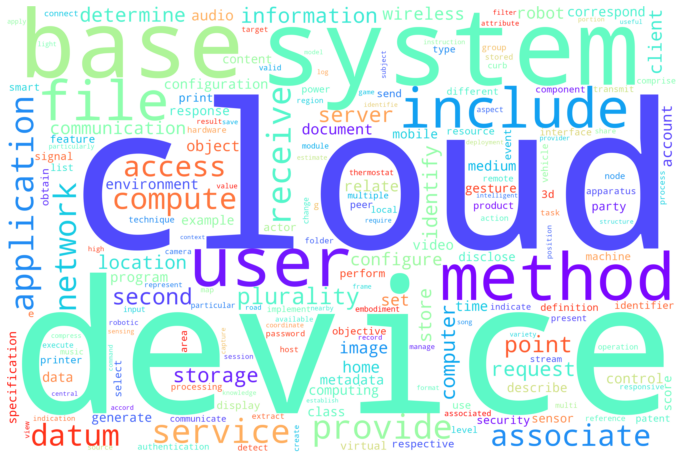

In [287]:
# Display the generated image:
plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [214]:
mask = np.array(Image.open(r'C:\Users\Louisa Zhao\Desktop\CS project\viz\word cloud\google.jpg'))

In [283]:
wordcloud2 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False,mask = mask).generate(' '.join(google_newlst))

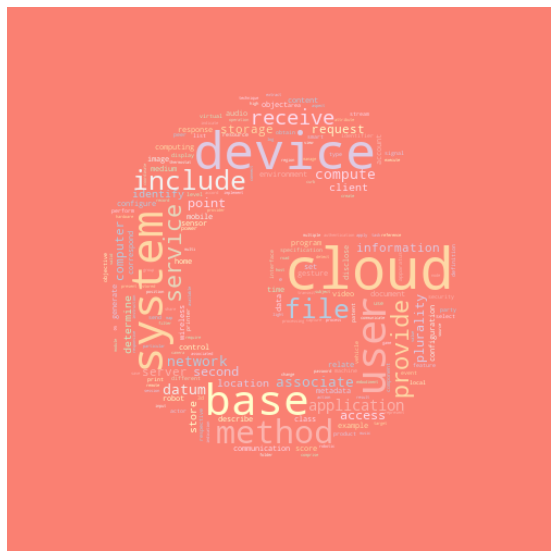

In [218]:
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [138]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in google_pos)

FreqDist({'second': 128, 'wireless': 68, 'audio': 41, 'virtual': 37, 'respective': 34, 'smart': 31, 'different': 30, 'local': 27, 'mobile': 27, 'remote': 26, ...})

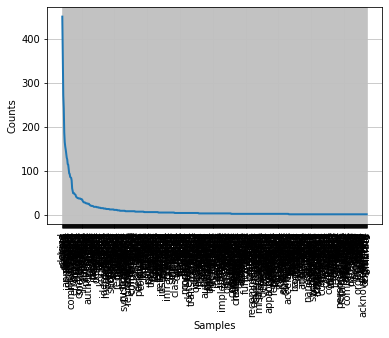

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [141]:
whcfdist_POStoWord['NN'].plot()

# Word Cloud for Amazon

In [228]:
amazon_newlst, amazon_pos = normalization_pip(amazon_text)

In [288]:
wordcloud_amazon = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='rainbow', collocations=False).generate(' '.join(amazon_newlst))

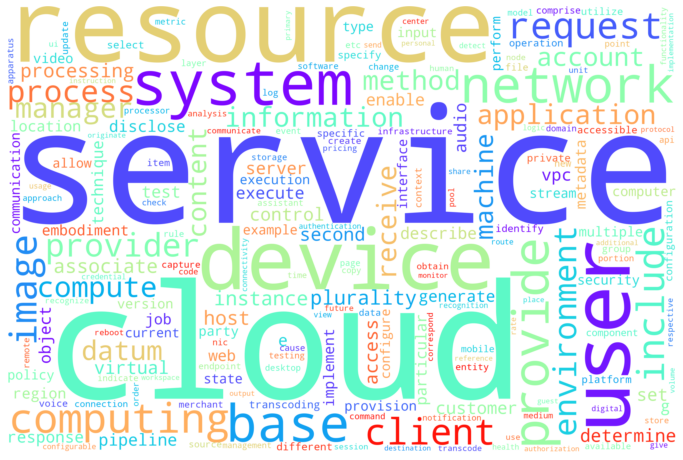

In [289]:
plt.figure(figsize=(12, 15))
plt.imshow(wordcloud_amazon, interpolation='bilinear')
plt.axis("off")
plt.show()

In [236]:
mask_amazon = mask = np.array(Image.open(r'C:\Users\Louisa Zhao\Desktop\CS project\viz\word cloud\amazon.jpg'))

In [290]:
wordcloud2 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='navy', colormap='rainbow', collocations=False,mask = mask_amazon).generate(' '.join(google_newlst))

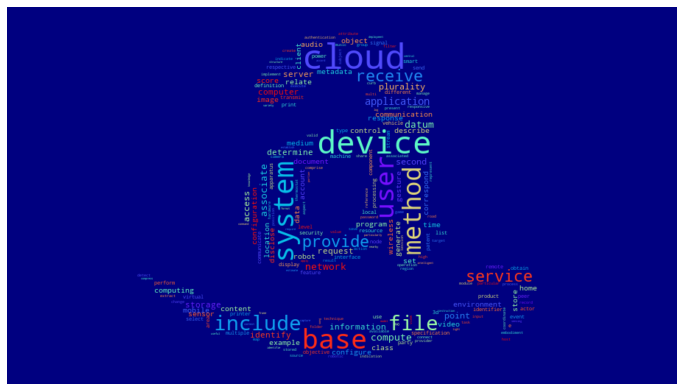

In [250]:
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word cloud for Microsoft

In [251]:
micro_newlst, micro_pos = normalization_pip(micro_text)

In [291]:
wordcloud_micro = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='rainbow', collocations=False).generate(' '.join(micro_newlst))

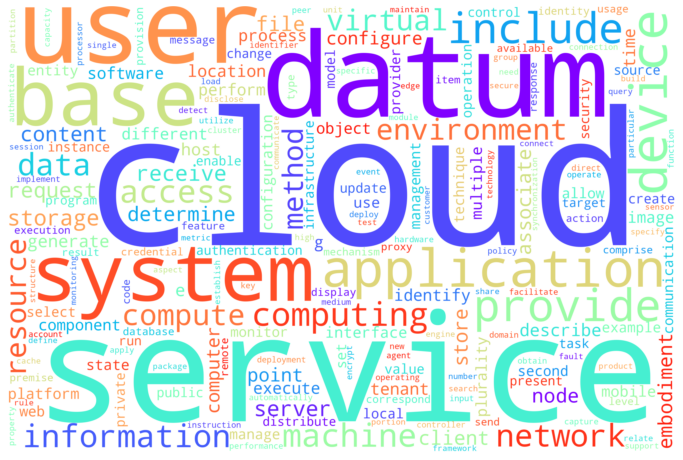

In [292]:
plt.figure(figsize=(12, 15))
plt.imshow(wordcloud_micro, interpolation='bilinear')
plt.axis("off")
plt.show()

In [279]:
mask_micro = mask = np.array(Image.open(r'C:\Users\Louisa Zhao\Desktop\CS project\viz\word cloud\microsoft3-2.jpg'))

In [280]:
wordcloud_micro2 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='grey', colormap='rainbow', collocations=False,mask = mask_micro).generate(' '.join(micro_newlst))

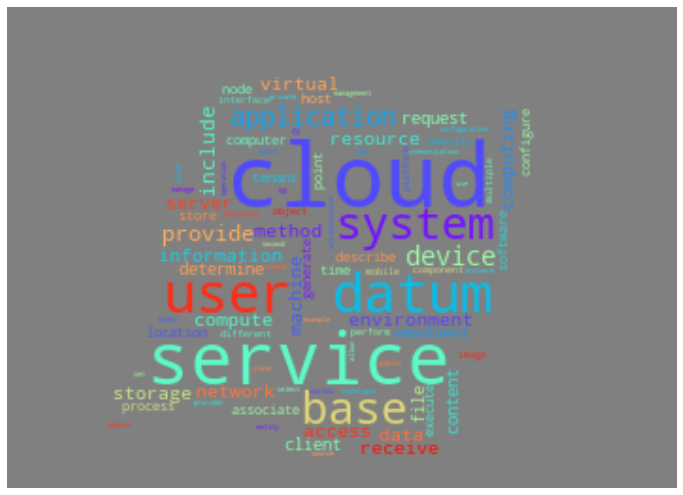

In [281]:
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud_micro2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Topic Modeling 

In [299]:
data = merge
data.head()

,patent_number,patent_date,patent_num_combined_citations,patent_kind,patent_abstract,patent_id,patent_title,tokenized
0,10009238,2018-06-26,59,B2,A cloud management system is described herein ...,10009238,NaN,Systems and methods are disclosed herein for s...
1,10013239,2018-07-03,23,B2,"Methods, systems, and computer program product...",10013239,NaN,Systems and methods are disclosed herein for s...
2,10025492,2018-07-17,40,B2,A pointing detecting device is described. In a...,10025492,NaN,Systems and methods are disclosed herein for s...
3,10025678,2018-07-17,35,B2,Systems and methods are provided for any party...,10025678,NaN,Systems and methods are disclosed herein for s...
4,10026041,2018-07-17,31,B2,An interoperable platform that provides a way ...,10026041,NaN,Systems and methods are disclosed herein for s...


In [295]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
#nltk.download('wordnet')

In [296]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Louisa
[nltk_data]     Zhao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [304]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [302]:
from nltk import PorterStemmer
PorterStemmer().stem('complications')

'complic'

In [305]:
processced_docs = data['patent_abstract'].map(preprocess)

In [306]:
processced_docs[:10]

0    [cloud, manag, describ, provid, abil, applic, ...
1    [method, system, program, product, provid, dev...
2    [point, detect, devic, describ, embodi, devic,...
3    [system, method, provid, parti, cloud, ecosyst...
4    [interoper, platform, provid, automat, compos,...
5    [techniqu, system, provid, cloud, servic, host...
6    [technolog, describ, provid, monitor, servic, ...
7    [technolog, describ, pertain, automat, situ, c...
8    [embodi, direct, provid, ident, risk, score, a...
9    [embodi, person, network, access, point, nap, ...
Name: patent_abstract, dtype: object

In [308]:
#Bag of word
dictionary = gensim.corpora.Dictionary(processced_docs)

In [309]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abil
1 allow
2 applic
3 central
4 cloud
5 commun
6 connect
7 coordin
8 creat
9 datacent
10 debug


In [310]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [313]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processced_docs]
bow_corpus[1]

[(2, 11),
 (7, 1),
 (15, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 7),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 2),
 (36, 2),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 7),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 6),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 3),
 (53, 1),
 (54, 6)]

In [314]:
bow_doc_4310 = bow_corpus[1]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 2 ("applic") appears 11 time.
Word 7 ("creat") appears 1 time.
Word 15 ("instanc") appears 1 time.
Word 28 ("access") appears 1 time.
Word 29 ("appli") appears 1 time.
Word 30 ("associ") appears 1 time.
Word 31 ("data") appears 7 time.
Word 32 ("defin") appears 1 time.
Word 33 ("deploy") appears 1 time.
Word 34 ("develop") appears 1 time.
Word 35 ("domain") appears 2 time.
Word 36 ("gener") appears 2 time.
Word 37 ("implement") appears 1 time.
Word 38 ("includ") appears 1 time.
Word 39 ("indic") appears 1 time.
Word 40 ("instanti") appears 1 time.
Word 41 ("method") appears 1 time.
Word 42 ("network") appears 1 time.
Word 43 ("packag") appears 7 time.
Word 44 ("produc") appears 1 time.
Word 45 ("product") appears 1 time.
Word 46 ("program") appears 1 time.
Word 47 ("queri") appears 1 time.
Word 48 ("real") appears 6 time.
Word 49 ("receiv") appears 1 time.
Word 50 ("refer") appears 1 time.
Word 51 ("select") appears 1 time.
Word 52 ("servic") appears 3 time.
Word 53 ("system") app

In [315]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.15157262017698434),
 (1, 0.09685707378533258),
 (2, 0.39166550808069467),
 (3, 0.13624175555696444),
 (4, 0.08118371544032071),
 (5, 0.18951987817001675),
 (6, 0.14451042565278635),
 (7, 0.10435125923284652),
 (8, 0.17840047948420776),
 (9, 0.06815194079458096),
 (10, 0.09122512069615209),
 (11, 0.10698906439622187),
 (12, 0.15118735256863255),
 (13, 0.10091080473494493),
 (14, 0.25681015276891705),
 (15, 0.11097707706411443),
 (16, 0.15313580099135773),
 (17, 0.09122512069615209),
 (18, 0.17302062527058049),
 (19, 0.17056380031170182),
 (20, 0.1724927049144304),
 (21, 0.35796197646241285),
 (22, 0.3441511920869779),
 (23, 0.28551378078828965),
 (24, 0.07455789760905283),
 (25, 0.11218793840535247),
 (26, 0.13117911854006997),
 (27, 0.26429012669867347)]


In [316]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [318]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.046*"devic" + 0.038*"data" + 0.035*"point" + 0.033*"object" + 0.030*"user" + 0.023*"comput" + 0.018*"relat" + 0.017*"home" + 0.014*"secur" + 0.012*"includ"
Topic: 1 
Words: 0.033*"servic" + 0.029*"applic" + 0.024*"devic" + 0.023*"comput" + 0.021*"includ" + 0.021*"user" + 0.018*"request" + 0.018*"point" + 0.018*"file" + 0.017*"method"
Topic: 2 
Words: 0.061*"servic" + 0.037*"data" + 0.029*"access" + 0.028*"comput" + 0.021*"environ" + 0.017*"client" + 0.017*"applic" + 0.016*"manag" + 0.015*"control" + 0.015*"user"
Topic: 3 
Words: 0.047*"user" + 0.028*"includ" + 0.026*"servic" + 0.024*"method" + 0.020*"data" + 0.015*"audio" + 0.015*"comput" + 0.015*"compon" + 0.014*"perform" + 0.014*"file"
Topic: 4 
Words: 0.053*"applic" + 0.046*"machin" + 0.041*"virtual" + 0.029*"devic" + 0.029*"commun" + 0.026*"comput" + 0.024*"user" + 0.023*"servic" + 0.018*"access" + 0.015*"document"
Topic: 5 
Words: 0.080*"servic" + 0.028*"network" + 0.025*"resourc" + 0.021*"user" + 0.019*"account

In [319]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.016*"file" + 0.014*"devic" + 0.014*"user" + 0.014*"data" + 0.012*"mobil" + 0.011*"applic" + 0.010*"access" + 0.010*"authent" + 0.010*"entiti" + 0.009*"share"
Topic: 1 Word: 0.015*"machin" + 0.012*"host" + 0.011*"audio" + 0.011*"virtual" + 0.011*"object" + 0.011*"home" + 0.011*"resourc" + 0.010*"tenant" + 0.010*"devic" + 0.010*"applic"
Topic: 2 Word: 0.015*"user" + 0.014*"devic" + 0.014*"data" + 0.011*"point" + 0.011*"servic" + 0.011*"object" + 0.010*"resourc" + 0.009*"client" + 0.009*"configur" + 0.008*"comput"
Topic: 3 Word: 0.017*"account" + 0.016*"content" + 0.015*"devic" + 0.015*"logic" + 0.015*"client" + 0.011*"user" + 0.011*"resourc" + 0.011*"servic" + 0.010*"document" + 0.010*"file"
Topic: 4 Word: 0.017*"encrypt" + 0.015*"imag" + 0.014*"devic" + 0.012*"data" + 0.012*"secur" + 0.011*"process" + 0.009*"processor" + 0.009*"servic" + 0.008*"user" + 0.008*"virtual"
Topic: 5 Word: 0.029*"applic" + 0.016*"migrat" + 0.014*"custom" + 0.012*"metadata" + 0.011*"user" + 0.0

In [322]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = merge['patent_abstract']
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to C:\Users\Louisa
[nltk_data]     Zhao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['cloud', 'management', 'system', 'described', 'herein', 'provides', 'ability', 'application', 'span', 'two', 'clouds', 'allowing', 'operation', 'management', 'troubleshooting', 'distributed', 'application', 'single', 'application', 'system', 'provides', 'infrastructure', 'communicates', 'across', 'datacenters', 'execution', 'centralizing', 'knowledge', 'instances', 'application']


In [323]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 4), (2, 1), (3, 6), (4, 1), (5, 1), (6, 3), (7, 5), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


In [324]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"cloud" + 0.021*"may" + 0.021*"service" + 0.014*"content" + '
  '0.013*"user" + 0.012*"device" + 0.010*"based" + 0.010*"data" + '
  '0.010*"files" + 0.010*"client"'),
 (1,
  '0.029*"cloud" + 0.023*"system" + 0.014*"based" + 0.013*"data" + '
  '0.013*"file" + 0.011*"service" + 0.011*"application" + 0.011*"computing" + '
  '0.010*"storage" + 0.009*"client"'),
 (2,
  '0.044*"cloud" + 0.027*"data" + 0.021*"user" + 0.018*"computing" + '
  '0.014*"based" + 0.014*"service" + 0.013*"system" + 0.012*"application" + '
  '0.012*"may" + 0.008*"one"'),
 (3,
  '0.028*"cloud" + 0.023*"system" + 0.019*"may" + 0.018*"data" + '
  '0.016*"information" + 0.011*"user" + 0.011*"service" + 0.011*"application" '
  '+ 0.011*"server" + 0.010*"based"'),
 (4,
  '0.022*"cloud" + 0.020*"user" + 0.016*"device" + 0.015*"one" + 0.014*"first" '
  '+ 0.014*"content" + 0.012*"network" + 0.012*"may" + 0.012*"based" + '
  '0.010*"data"'),
 (5,
  '0.034*"cloud" + 0.024*"service" + 0.023*"based" + 0.021*"first"

In [327]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:\Users\Louisa Zhao\Desktop\CS project'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.018881 -0.033635       1        1  14.296413
2     -0.001146  0.008377       2        1  13.584990
7     -0.005498 -0.012440       3        1  12.926424
5     -0.064852  0.000420       4        1  10.971248
3      0.000165  0.038859       5        1  10.870761
9      0.029257 -0.055828       6        1  10.383349
1     -0.014527  0.058487       7        1   8.179328
6      0.032634  0.037006       8        1   7.752178
4     -0.041390 -0.032451       9        1   6.245107
0      0.084237 -0.008795      10        1   4.790202, topic_info=            Term         Freq        Total Category  logprob  loglift
473      content   288.000000   288.000000  Default  30.0000  30.0000
248        first   461.000000   461.000000  Default  29.0000  29.0000
103       device   787.000000   787.000000  Default  28.0000  28.0000
86       service   990.000000   990.000000  Default  27.0000  27.0000
235          may  1121.000000  1121.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
192  information    13.705279   449.359385  Topic10  -5.4746  -0.4514
319       server    12.561152   309.041804  Topic10  -5.5618  -0.1643
39      provided    11.391693   265.979088  Topic10  -5.6595  -0.1119
73       network    11.508138   504.625877  Topic10  -5.6494  -0.7422
240        using    10.917326   227.233334  Topic10  -5.7021   0.0030

[805 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
4364      2  0.724528  acceptability
323       1  0.075039         access
323       2  0.155253         access
323       3  0.126790         access
323       4  0.134552         access
...     ...       ...            ...
294       5  0.080509      workspace
294       6  0.161018      workspace
1077      9  0.352909           worn
3999      2  0.347758          zones
3999     10  0.347758          zones

[2373 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 8, 6, 4, 10, 2, 7, 5, 1])